# Computer Vision Assignment #2 2016-16466 윤웅상

In [1]:
import numpy as np
import math
import matplotlib.image as pimg
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.pyplot import figure
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
afghan_clean=pimg.imread('afghan_clean.png')
afghan_noise1=pimg.imread('afghan_noise1.png')
afghan_noise2=pimg.imread('afghan_noise2.png')
monkey_clean=pimg.imread('monkey_clean.png')
monkey_noise1=pimg.imread('monkey_noise1.png')
monkey_noise2=pimg.imread('monkey_noise2.png')

과제 2에서는 gaussian window를 사용한 gaussian weighted guided filter를 설계해보고 실험을 통해 다른 파라미터에대한 효과를 살펴보고 weighted median filter에 box filter, gaussian filter, bilateral filter를 결합하여 설계해보고 실험을 통해 어떤 결과를 도출하는지 비교 분석해본다.

<필터링을 할때 가장자리의 padding의 경우에는 원본이미지를 그대로 두고 계산하였다>

# 1번 문제

1-1 Write your program for the Gaussian weighted guided filtering algorithm

In [2]:
#Gaussian weighted guided filtering algorithm =GWGF

def convolution(image, kernel):
    size=kernel.shape[0]
    k=size//2
    height=image.shape[0]
    width=image.shape[1]
    new_image=np.copy(image)
    for i in range(k,height-k):
        for j in range(k,width-k):
            temp=np.multiply(image[i-k:i+k+1,j-k:j+k+1],kernel)
            new_image[i][j]=np.sum(temp)
    return new_image
    

def f_mean(image, sigma):
    w_size=int(np.ceil(sigma*6) // 2 * 2 + 1)
    n=w_size//2
    
    g_filter=np.zeros((w_size,w_size),np.float32)
    coef=1/(2*np.pi*sigma*sigma)
    for i in range(-n,n+1):
        for j in range(-n,n+1):
            g_filter[i+n,j+n]=coef*np.exp(-(i**2+j**2)/(2*sigma*sigma))

    new_image=convolution(image,g_filter)
    return new_image


def GWGF(image_p, gimage_i, radius_r, reg_e):
    reg_e=np.float32(reg_e)
    sigma=radius_r/2
    mean_i=f_mean(gimage_i, sigma)
    mean_p=f_mean(image_p, sigma)
    corr_i=f_mean(np.multiply(image_p,image_p), sigma)
    corr_ip=f_mean(np.multiply(gimage_i,image_p), sigma)
    var_i=corr_i-np.multiply(mean_i,mean_i)
    cov_ip=corr_ip-np.multiply(mean_i,mean_p)
    a=np.divide(cov_ip,var_i+reg_e)
    b=mean_p-np.multiply(a,mean_i)
    mean_a=f_mean(a, sigma)
    mean_b=f_mean(b, sigma)
    q=np.multiply(mean_a,gimage_i)+mean_b
    return q


            
    

1-2 Given test noisy color images (afghan_noise#.png), convert them into grey images

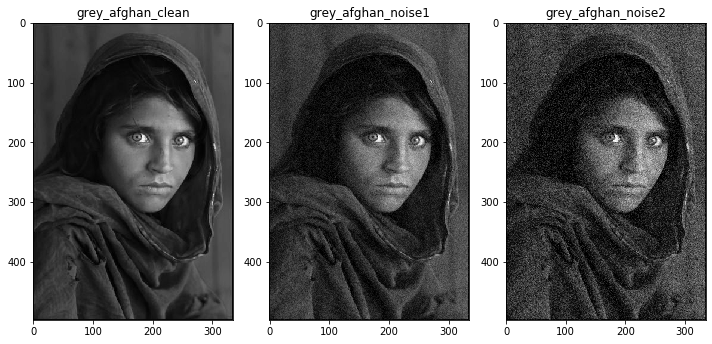

In [3]:
grey_afghan_clean=(1/3)*(afghan_clean[:,:,0]+afghan_clean[:,:,1]+afghan_clean[:,:,2])
grey_afghan_noise1=(1/3)*(afghan_noise1[:,:,0]+afghan_noise1[:,:,1]+afghan_noise1[:,:,2])
grey_afghan_noise2=(1/3)*(afghan_noise2[:,:,0]+afghan_noise2[:,:,1]+afghan_noise2[:,:,2])
plt.subplot(131)
plt.title('grey_afghan_clean')
plt.imshow(grey_afghan_clean, cmap='gray')
plt.subplot(132)
plt.title('grey_afghan_noise1')
plt.imshow(grey_afghan_noise1, cmap='gray')
plt.subplot(133)
plt.title('grey_afghan_noise2')
plt.imshow(grey_afghan_noise2, cmap='gray')
plt.tight_layout()

1-3 Clean the grey images by your algorithm by settingpI=. How about setting I as one of R, G and B?

Gaussian weighted guided filtering algorithm 를 테스팅 하기 위해서 radius=2, regularization e= 0.4^2 으로 설정했다. 이때 sigma=raidus/2 가 된다

In [4]:
new_afghan_noise1_i=GWGF(grey_afghan_noise1,grey_afghan_noise1,2,0.16)
new_afghan_noise1_r=GWGF(grey_afghan_noise1,afghan_noise1[:,:,0],2,0.16)
new_afghan_noise1_g=GWGF(grey_afghan_noise1,afghan_noise1[:,:,1],2,0.16)
new_afghan_noise1_b=GWGF(grey_afghan_noise1,afghan_noise1[:,:,2],2,0.16)
new_afghan_noise2_i=GWGF(grey_afghan_noise2,grey_afghan_noise2,2,0.16)
new_afghan_noise2_r=GWGF(grey_afghan_noise2,afghan_noise2[:,:,0],2,0.16)
new_afghan_noise2_g=GWGF(grey_afghan_noise2,afghan_noise2[:,:,1],2,0.16)
new_afghan_noise2_b=GWGF(grey_afghan_noise2,afghan_noise2[:,:,2],2,0.16)
print('finished_calculating')

finished_calculating


노이즈1 이미지와 노이즈2 이미지에 대해 각각 I=P 인 필터를 적용한 결과이다


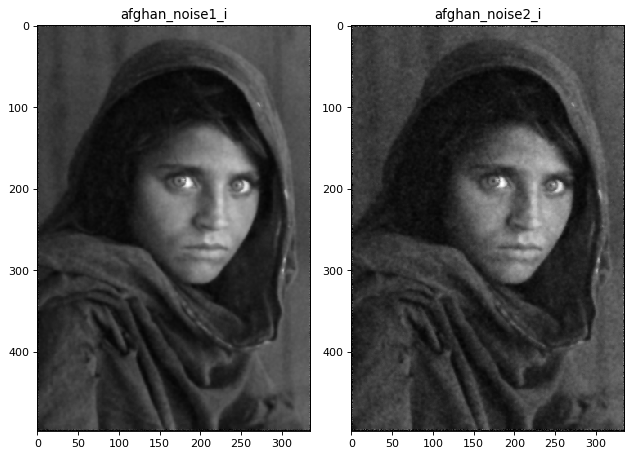

In [5]:
figure(figsize=(8, 6), dpi=80)
plt.subplot(121)
plt.title('afghan_noise1_i')
plt.imshow(new_afghan_noise1_i, cmap='gray')
plt.subplot(122)
plt.title('afghan_noise2_i')
plt.imshow(new_afghan_noise2_i, cmap='gray')
plt.tight_layout()
print('노이즈1 이미지와 노이즈2 이미지에 대해 각각 I=P 인 필터를 적용한 결과이다')

순서대로 r,g, b 성분을 guidance image로 적용해서 계산한 결과이다


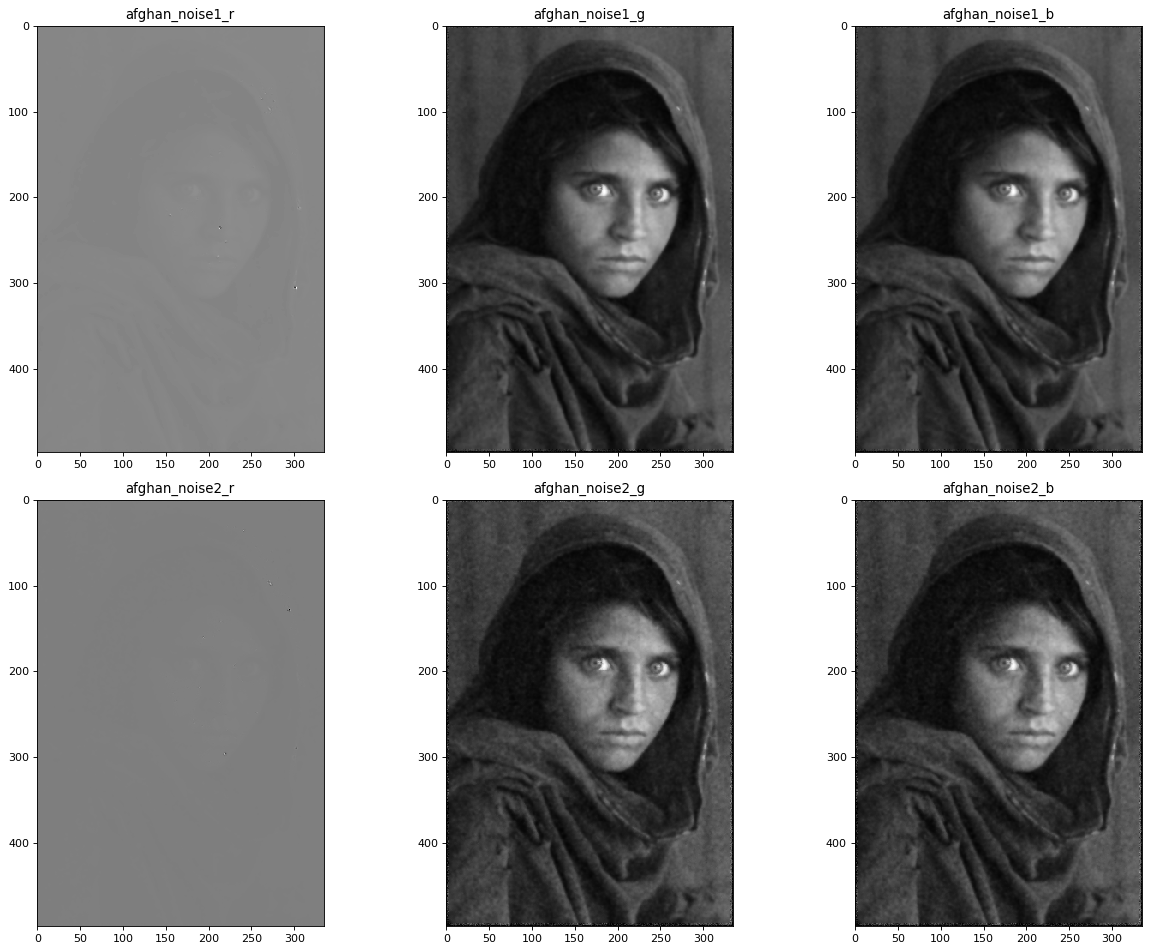

In [6]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(231)
plt.title('afghan_noise1_r')
plt.imshow(new_afghan_noise1_r, cmap='gray')
plt.subplot(232)
plt.title('afghan_noise1_g')
plt.imshow(new_afghan_noise1_g, cmap='gray')
plt.subplot(233)
plt.title('afghan_noise1_b')
plt.imshow(new_afghan_noise1_b, cmap='gray')
plt.subplot(234)
plt.title('afghan_noise2_r')
plt.imshow(new_afghan_noise2_r, cmap='gray')
plt.subplot(235)
plt.title('afghan_noise2_g')
plt.imshow(new_afghan_noise2_g, cmap='gray')
plt.subplot(236)
plt.title('afghan_noise2_b')
plt.imshow(new_afghan_noise2_b, cmap='gray')
plt.tight_layout()
print('순서대로 r,g, b 성분을 guidance image로 적용해서 계산한 결과이다')

실험결과를 보면 알 수 있듯이 R의 이미지를 사용한 경우에는 제대로 실험결과가 나타나지 않았는데, 이는 regularization e 의 영향이 크다 red 이미지의 경우도 regularization e를 0.4로 증가시키면 제대로된 결과가 나온다.

e를 0.4로 증가시킬경우 제대로된 결과를 도출한것을 확인할 수 있다


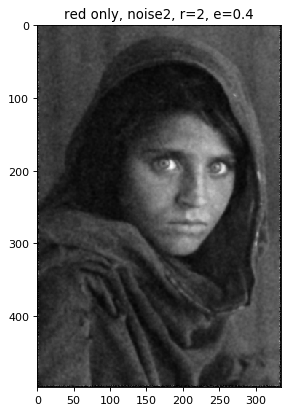

In [7]:
fixed_red_noise2=GWGF(grey_afghan_noise2,afghan_noise2[:,:,0],2,0.4)
figure(figsize=(8, 6), dpi=80)
plt.title('red only, noise2, r=2, e=0.4')
plt.imshow(fixed_red_noise2, cmap='gray')
print('e를 0.4로 증가시킬경우 제대로된 결과를 도출한것을 확인할 수 있다')

1-4 Modify your algorithm for multichannel input and test it on the color images.

In [8]:
def mul_GWGF(image_p, gimage_i, radius_r, reg_e):
    new_image=np.copy(image_p)
    for i in range(3):
        new_image[:,:,i]=GWGF(image_p[:,:,i],gimage_i[:,:,i],radius_r,reg_e)
    return new_image
    

1-5 Show the noisy images and filtered images with different parameter settings.

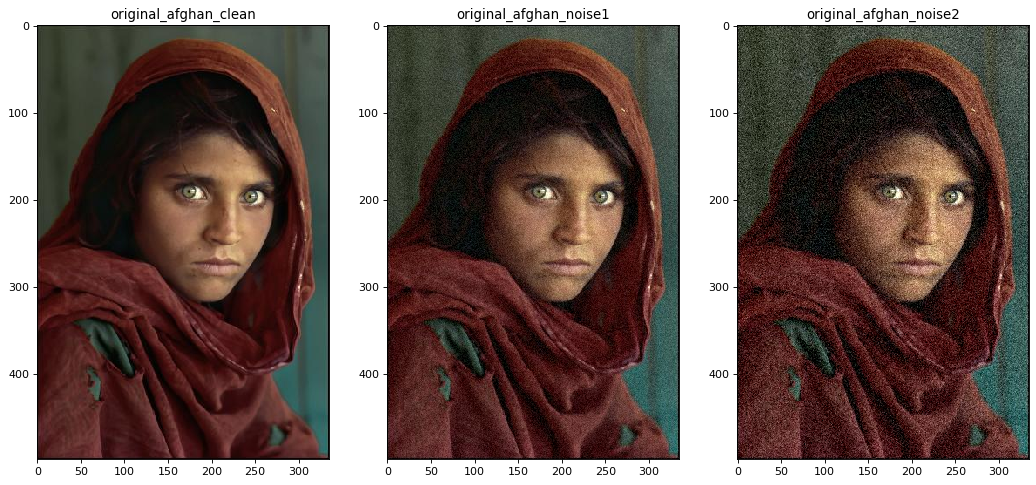

In [9]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(131)
plt.title('original_afghan_clean')
plt.imshow(afghan_clean)
plt.subplot(132)
plt.title('original_afghan_noise1')
plt.imshow(afghan_noise1)
plt.subplot(133)
plt.title('original_afghan_noise2')
plt.imshow(afghan_noise2)

노이즈 이미지에 대해 각각 다른 파라미터를 줘서 분석하기에는 양이 지나치게 많아지고, 특히나 노이즈2가 노이즈1 보다 더 노이즈가 심하기 때문에 노이즈2를 기준으로 비교분석하는것이 더 의미가 있고, 노이즈1의 분석과 중복되기때문에 다른 파라미터를 이용한 분석은 노이즈2 이미지를 기준으로 하겠다

PSNR :  77.44754609834878


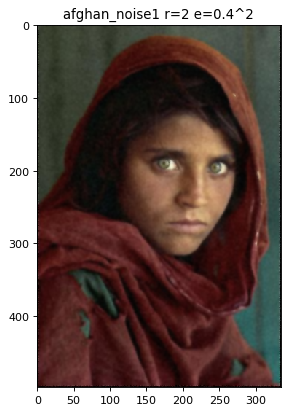

In [12]:
figure(figsize=(8, 6), dpi=80)
afghan_noise1_gwgf=mul_GWGF(afghan_noise1,afghan_noise1,2,0.16)
plt.title('afghan_noise1 r=2 e=0.4^2')
plt.imshow(afghan_noise1_gwgf)
print('PSNR : ',PSNR(afghan_clean,afghan_noise1_gwgf))

노이즈 1 이미지의 경우 PSNR 이 77dB에 이를정도로 원본과 거의 유사하게 필터링을 하였다

In [13]:
start = time.time()
afghan_noise2_11=mul_GWGF(afghan_noise2,afghan_noise2,2,0.01)
time1_1=time.time()-start
start=time.time()
afghan_noise2_12=mul_GWGF(afghan_noise2,afghan_noise2,2,0.04)
time1_2=time.time()-start
start=time.time()
afghan_noise2_13=mul_GWGF(afghan_noise2,afghan_noise2,2,0.16)
time1_3=time.time()-start
start=time.time()
afghan_noise2_21=mul_GWGF(afghan_noise2,afghan_noise2,4,0.01)
time1_4=time.time()-start
start=time.time()
afghan_noise2_22=mul_GWGF(afghan_noise2,afghan_noise2,4,0.04)
time1_5=time.time()-start
start=time.time()
afghan_noise2_23=mul_GWGF(afghan_noise2,afghan_noise2,4,0.16)
time1_6=time.time()-start
start=time.time()
afghan_noise2_31=mul_GWGF(afghan_noise2,afghan_noise2,8,0.01)
time1_7=time.time()-start
start=time.time()
afghan_noise2_32=mul_GWGF(afghan_noise2,afghan_noise2,8,0.04)
time1_8=time.time()-start
start=time.time()
afghan_noise2_33=mul_GWGF(afghan_noise2,afghan_noise2,8,0.16)
time1_9=time.time()-start
start=time.time()
print('finished calculating')

KeyboardInterrupt: 

In [ ]:
print('noise2 이미지를 가지고 계산했다')
plt.subplot(331)
plt.title('r=2, reg_e=0.1^2')
plt.imshow(afghan_noise2_11)
plt.subplot(332)
plt.title('r=2, reg_e=0.2^2')
plt.imshow(afghan_noise2_12)
plt.subplot(333)
plt.title('r=2, reg_e=0.4^2')
plt.imshow(afghan_noise2_13)
plt.subplot(334)
plt.title('r=4, reg_e=0.1^2')
plt.imshow(afghan_noise2_21)
plt.subplot(335)
plt.title('r=4, reg_e=0.2^2')
plt.imshow(afghan_noise2_22)
plt.subplot(336)
plt.title('r=4, reg_e=0.4^2')
plt.imshow(afghan_noise2_23)
plt.subplot(337)
plt.title('r=8, reg_e=0.1^2')
plt.imshow(afghan_noise2_31)
plt.subplot(338)
plt.title('r=8, reg_e=0.2^2')
plt.imshow(afghan_noise2_32)
plt.subplot(339)
plt.title('r=8, reg_e=0.4^2')
plt.imshow(afghan_noise2_33)


1-6 Provide the best result, its PSNR value and the running time.

In [11]:
def MSE(image1, image2):
    err=np.sum((image1-image2)**2)
    err/=(image1.shape[0]*image2.shape[1])
    return err

def PSNR(image1, image2):
    err=MSE(image1,image2)
    return 20 * math.log10(255.0 / math.sqrt(err))

In [ ]:
result1_psnr=np.zeros((3,3))
result1_psnr[0][0]=PSNR(afghan_clean,afghan_noise2_11)
result1_psnr[0][1]=PSNR(afghan_clean,afghan_noise2_12)
result1_psnr[0][2]=PSNR(afghan_clean,afghan_noise2_13)
result1_psnr[1][0]=PSNR(afghan_clean,afghan_noise2_21)
result1_psnr[1][1]=PSNR(afghan_clean,afghan_noise2_22)
result1_psnr[1][2]=PSNR(afghan_clean,afghan_noise2_23)
result1_psnr[2][0]=PSNR(afghan_clean,afghan_noise2_31)
result1_psnr[2][1]=PSNR(afghan_clean,afghan_noise2_32)
result1_psnr[2][2]=PSNR(afghan_clean,afghan_noise2_33)
print('psnr result, 단위는 dB')
pd.DataFrame(result1_psnr, index=['r=2','r=4','r=8'],columns=["reg_e=0.1^2", "reg_e=0.2^2", 'reg_e=0.4^2'])

In [ ]:
result1_time=np.zeros((3,3))
result1_time[0][0]=time1_1
result1_time[0][1]=time1_2
result1_time[0][2]=time1_3
result1_time[1][0]=time1_4
result1_time[1][1]=time1_5
result1_time[1][2]=time1_6
result1_time[2][0]=time1_7
result1_time[2][1]=time1_8
result1_time[2][2]=time1_9
print('time result, 단위는 초')
pd.DataFrame(result1_time, index=['r=2','r=4','r=8'],columns=["reg_e=0.1^2", "reg_e=0.2^2", 'reg_e=0.4^2'])

In [14]:
print(afghan_noise1)

[[[0.         0.         0.        ]
  [0.00392157 0.02745098 0.        ]
  [0.01568628 0.02745098 0.01568628]
  ...
  [0.         0.         0.        ]
  [0.02745098 0.03529412 0.01568628]
  [0.         0.         0.        ]]

 [[0.05882353 0.08235294 0.03529412]
  [0.1764706  0.2        0.15294118]
  [0.15294118 0.1764706  0.12941177]
  ...
  [0.34901962 0.35686275 0.3372549 ]
  [0.2509804  0.25882354 0.23921569]
  [0.03137255 0.03529412 0.01568628]]

 [[0.         0.00784314 0.        ]
  [0.21176471 0.23529412 0.1882353 ]
  [0.27450982 0.29803923 0.2509804 ]
  ...
  [0.3647059  0.37254903 0.3529412 ]
  [0.3882353  0.39607844 0.3764706 ]
  [0.11372549 0.11764706 0.11372549]]

 ...

 [[0.08235294 0.01176471 0.01176471]
  [0.2        0.08627451 0.09411765]
  [0.16470589 0.03921569 0.04313726]
  ...
  [0.4392157  0.38039216 0.36862746]
  [0.36078432 0.2901961  0.2901961 ]
  [0.06666667 0.         0.        ]]

 [[0.09411765 0.00784314 0.01568628]
  [0.13333334 0.04705882 0.05490196]


실험결과 radius가 커질수록 전체적으로 원본과의 유사도가 떨어지는것을 확인할 수 있었다. 실행시간은 커널의 사이즈와 상관없이 거의 유사하게 걸렸다. 정성적으로 살펴보았을때 regularization 은 더 클수록 이미지가 흐릿해지고 원본과의 유사도가 낮아지는것을 확인할 수 있다. 그러나 정량적으로 살펴볼경우 reg_e가 0.2^2 일때와 0.4^2를 비교했을때 어느 한쪽이 더 우세하게 원본과 유사하지는 않았다. 결론적으로 적당한 값을 유지하는것이 중요하다. 종합적으로 가장 좋은 결과를 나타내는 필터는 r=2, reg_e=0.4^2인 필터이다

extra credit
우선 여기 아프간 여성분에게 생긴 노이즈는 가우시안 노이즈이다.
가우시안 노이즈는 높은 주파수 영역에 영향을 끼치기 때문에 이를 제거하기 위해서는 low pass filter를 통과시켜야 한다.
필터링의 성능을 개선하기 위해서는 윈도우 사이즈는 3x3으로 유지하고 reg_e를 좀더 크게하면 된다. 
러닝타임을 개선하기 위해서는 가장 중요한것은 파이썬을 사용하지 않는것이다. C++를 이용해서 계산을 하면 훨씬 빠를것으로 생각한다.

# 2번 문제

2-1 Now, implement the weighted median filters with different weight functions of

In [276]:
def box_filter(size):
    kernel=np.ones((size,size))
    kernel/=np.sum(kernel)
    return kernel

def gaussian_filter(sigma):
    k_size=int(np.ceil(sigma*6) // 2 * 2 + 1)
    n=k_size//2
    kernel=np.zeros((k_size,k_size),np.float32)
    coef=1/(2*np.pi*sigma*sigma)
    for i in range(-n,n+1):
        for j in range(-n,n+1):
            kernel[i+n,j+n]=coef*np.exp(-(i**2+j**2)/(2*sigma*sigma))
    return kernel


def bilateral_filter(image, sigma_space, sigma_range):
    k_size=int(np.ceil(sigma_space*6) // 2 * 2 + 1)
    n=k_size//2
    kernel_1=np.zeros((k_size,k_size),np.float32)
    kernel_2=np.zeros((k_size,k_size),np.float32)
    
    for i in range(-n,n+1):
        for j in range(-n,n+1):
            kernel_1[i+n,j+n]=np.exp(-(i**2+j**2)/(2*sigma_space*sigma_space))
    
    for i in range(-n,n+1):
        for j in range(-n,n+1):
            kernel_2[i+n,j+n]=np.exp(-((image[n][n]-image[i+n][j+n])**2)/(2*sigma_range*sigma_range))
    
    kernel=np.multiply(kernel_1,kernel_2)
    kernel/=np.sum(kernel)
    
    return kernel

def modified_median_filter(image, kernel, k_size):
    n=k_size//2
    histogram=np.zeros(256)
    for i in range(0,k_size):
        for j in range(0,k_size):
            histogram[int(255*image[i][j])]+=kernel[i][j]
    index=0
    hsum=np.sum(histogram)/2

    for i in range(256):
        hsum-=histogram[i]
        if hsum<0.0001:
            return (index/255)
        index+=1
    return -1 #error

def convolution2(image,kernel,k_size):
    new_image=np.copy(image)
    height=image.shape[0]
    width=image.shape[1]
    n=k_size//2
    for i in range(3):
        for j in range(n,height-n):
            for k in range(n,width-n):
                new_image[j][k][i]=modified_median_filter(image[j-n:j+n+1,k-n:k+n+1,i],kernel,k_size)
    return new_image
    
    
def conv_bilateral(image,sigma_space,sigma_range):
    new_image=np.copy(image)
    k_size=int(np.ceil(sigma_space*6) // 2 * 2 + 1)
    height=image.shape[0]
    width=image.shape[1]
    n=k_size//2
    kernel=np.zeros((k_size,k_size,3))
    kernel[:,:,0]=bilateral_filter(image[:,:,0], sigma_space, sigma_range)
    kernel[:,:,1]=bilateral_filter(image[:,:,1], sigma_space, sigma_range)
    kernel[:,:,2]=bilateral_filter(image[:,:,2], sigma_space, sigma_range)
    for i in range(3):
        for j in range(n,height-n):
            for k in range(n,width-n):
                new_image[j][k][i]=modified_median_filter(image[j-n:j+n+1,k-n:k+n+1,i],kernel[:,:,i],k_size)
    return new_image

2-2,3,4 algorithm testing

비교를 위해 올린 원본이미지, 노이즈1, 노이즈2 이다


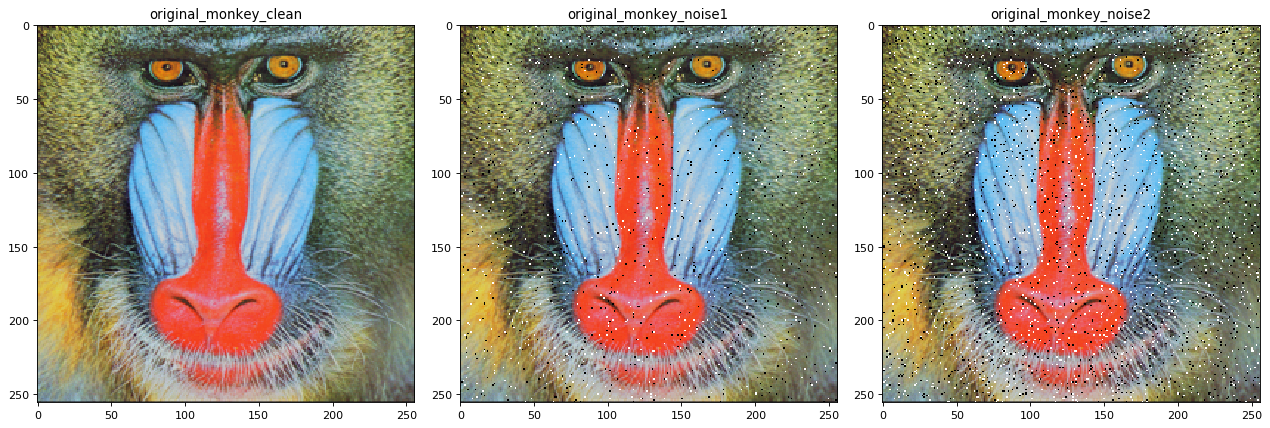

In [307]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(131)
plt.title('original_monkey_clean')
plt.imshow(monkey_clean)
plt.subplot(132)
plt.title('original_monkey_noise1')
plt.imshow(monkey_noise1)
plt.subplot(133)
plt.title('original_monkey_noise2')
plt.imshow(monkey_noise2)
plt.tight_layout()
print('비교를 위해 올린 원본이미지, 노이즈1, 노이즈2 이다')

In [258]:
box1=box_filter(3)
box2=box_filter(5)
box3=box_filter(9)
start = time.time()
monkey1_box1=convolution2(monkey_noise1,box1,3)
time2_b1=time.time()-start
start = time.time()
monkey1_box2=convolution2(monkey_noise1,box2,5)
time2_b2=time.time()-start
start = time.time()
monkey1_box3=convolution2(monkey_noise1,box3,9)
time2_b3=time.time()-start
start = time.time()
monkey2_box1=convolution2(monkey_noise2,box1,3)
time2_b4=time.time()-start
start = time.time()
monkey2_box2=convolution2(monkey_noise2,box2,5)
time2_b5=time.time()-start
start = time.time()
monkey2_box3=convolution2(monkey_noise2,box3,9)
time2_b6=time.time()-start


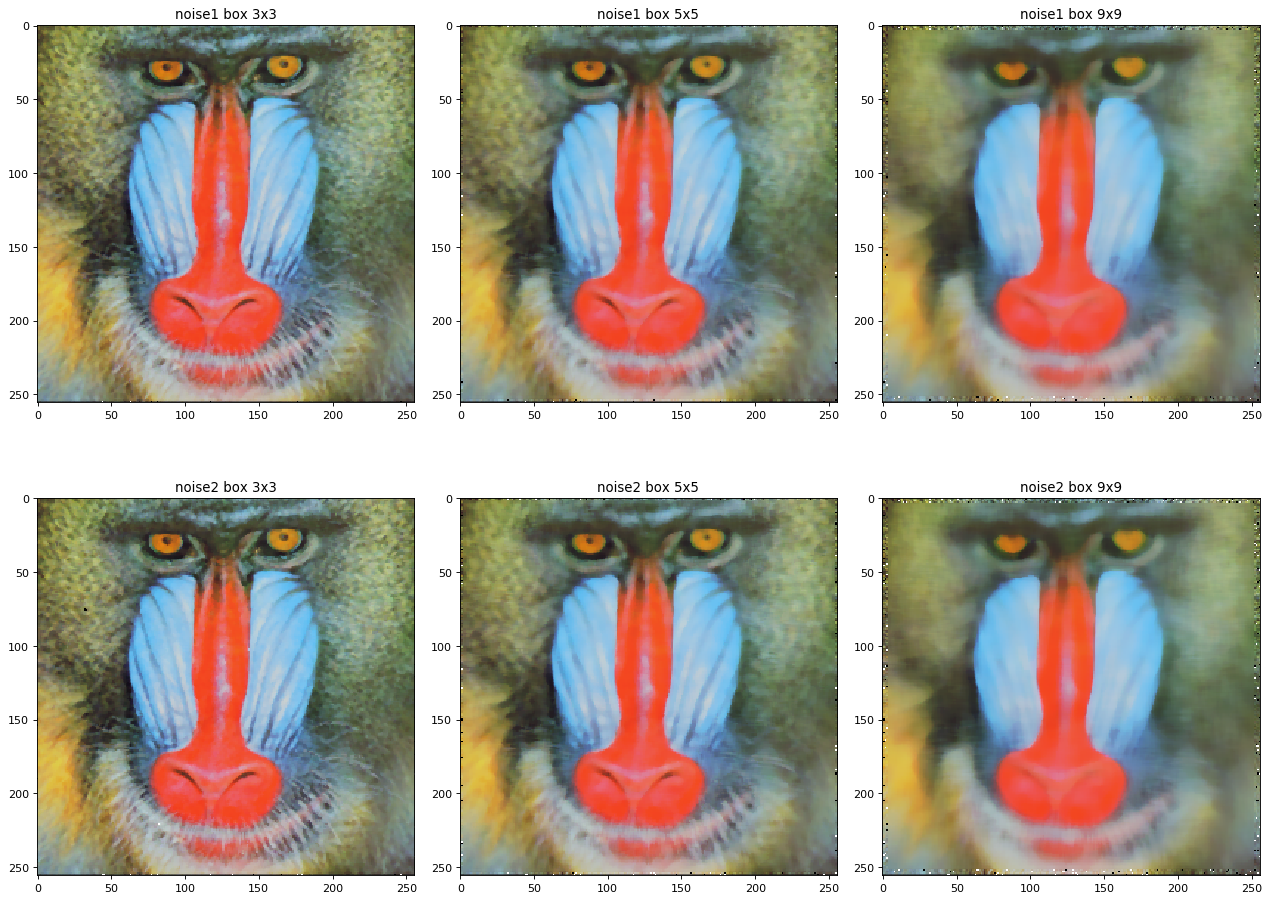

In [261]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(231)
plt.title('noise1 box 3x3')
plt.imshow(monkey1_box1)
plt.subplot(232)
plt.title('noise1 box 5x5')
plt.imshow(monkey1_box2)
plt.subplot(233)
plt.title('noise1 box 9x9')
plt.imshow(monkey1_box3)
plt.subplot(234)
plt.title('noise2 box 3x3')
plt.imshow(monkey2_box1)
plt.subplot(235)
plt.title('noise2 box 5x5')
plt.imshow(monkey2_box2)
plt.subplot(236)
plt.title('noise2 box 9x9')
plt.imshow(monkey2_box3)
plt.tight_layout()

In [284]:
result2_psnr_b=np.zeros((2,3))
result2_psnr_b[0][0]=PSNR(monkey_clean,monkey1_box1)
result2_psnr_b[0][1]=PSNR(monkey_clean,monkey1_box2)
result2_psnr_b[0][2]=PSNR(monkey_clean,monkey1_box3)
result2_psnr_b[1][0]=PSNR(monkey_clean,monkey2_box1)
result2_psnr_b[1][1]=PSNR(monkey_clean,monkey2_box2)
result2_psnr_b[1][2]=PSNR(monkey_clean,monkey2_box3)
print('box filter psnr result, 단위는 dB')
pd.DataFrame(result2_psnr_b, index=['noise1','noise2'],columns=["3x3", "5x5", '9x9'])

box filter psnr result, 단위는 dB


3x3        5x5        9x9
noise1  68.586425  66.485560  65.158808
noise2  68.204862  66.169263  64.834225

In [286]:
result2_time_b=np.zeros((2,3))
result2_time_b[0][0]=time2_b1
result2_time_b[0][1]=time2_b2
result2_time_b[0][2]=time2_b3
result2_time_b[1][0]=time2_b4
result2_time_b[1][1]=time2_b5
result2_time_b[1][2]=time2_b6
print('time result, 단위는 초')
pd.DataFrame(result2_time_b, index=['noise1','noise2'],columns=["3x3", "5x5", '9x9'])

time result, 단위는 초


3x3        5x5        9x9
noise1  14.789319  23.827030  56.559982
noise2  16.003098  26.486514  58.107708

박스 필터를 곱해준 경우 정성적으로 봤을때 아주 단순한 필터임에도 굉장히 훌륭한 결과를 나타내었다. 노이즈 1,2 모두 효과적으로 제거하였으며 보기에도 원본이미지와 굉장히 유사하다. 박스의 사이즈가 커질 경우 median을 찾는 필터이기 때문에 디테일을 놓치는것을 확인할 수 있다. 3x3과 9x9 필터를 비교하였을시에 9x9필터를 통과시킨 결과는 디테일이 생략되어 눈동자가 아예 없는것을 확인할 수 있다.
정량적으로 비교할경우 박스필터의 사이즈를 크게할경우 원본과의 유사도가 떨어졌으며, 시간도 무척 늘어난것을 확인할 수 있다.

In [262]:
g_1=gaussian_filter(0.6)
g_2=gaussian_filter(1)
g_3=gaussian_filter(1.6)
start = time.time()
monkey1_g1=convolution2(monkey_noise1,g_1,3)
time2_g1=time.time()-start
start = time.time()
monkey1_g2=convolution2(monkey_noise1,g_2,5)
time2_g2=time.time()-start
start = time.time()
monkey1_g3=convolution2(monkey_noise1,g_3,9)
time2_g3=time.time()-start
start = time.time()
monkey2_g1=convolution2(monkey_noise2,g_1,3)
time2_g4=time.time()-start
start = time.time()
monkey2_g2=convolution2(monkey_noise2,g_2,5)
time2_g5=time.time()-start
start = time.time()
monkey2_g3=convolution2(monkey_noise2,g_3,9)
time2_g6=time.time()-start

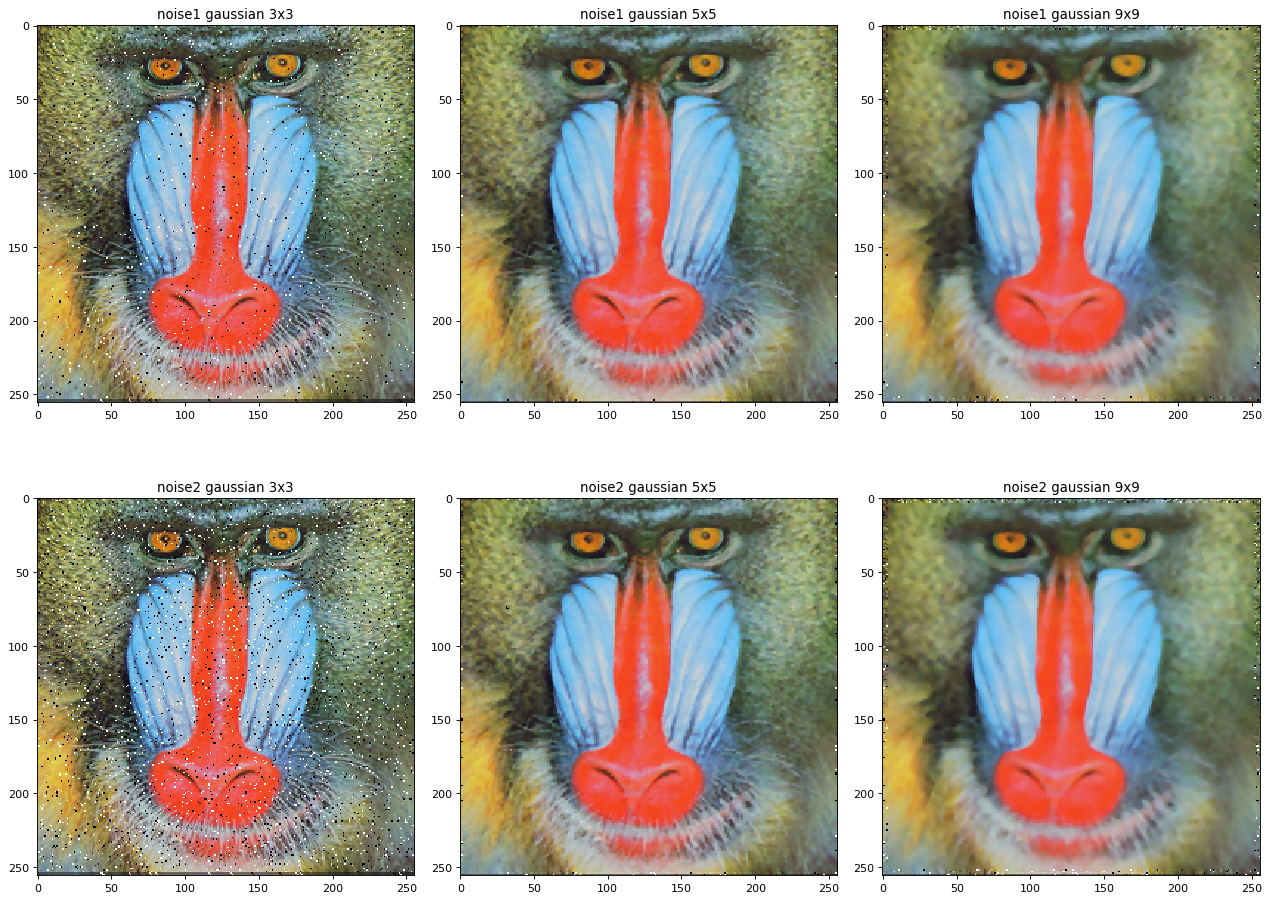

In [263]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(231)
plt.title('noise1 gaussian 3x3')
plt.imshow(monkey1_g1)
plt.subplot(232)
plt.title('noise1 gaussian 5x5')
plt.imshow(monkey1_g2)
plt.subplot(233)
plt.title('noise1 gaussian 9x9')
plt.imshow(monkey1_g3)
plt.subplot(234)
plt.title('noise2 gaussian 3x3')
plt.imshow(monkey2_g1)
plt.subplot(235)
plt.title('noise2 gaussian 5x5')
plt.imshow(monkey2_g2)
plt.subplot(236)
plt.title('noise2 gaussian 9x9')
plt.imshow(monkey2_g3)
plt.tight_layout()

In [311]:
result2_psnr_g=np.zeros((2,3))
result2_psnr_g[0][0]=PSNR(monkey_clean,monkey1_g1)
result2_psnr_g[0][1]=PSNR(monkey_clean,monkey1_g2)
result2_psnr_g[0][2]=PSNR(monkey_clean,monkey1_g3)
result2_psnr_g[1][0]=PSNR(monkey_clean,monkey2_g1)
result2_psnr_g[1][1]=PSNR(monkey_clean,monkey2_g2)
result2_psnr_g[1][2]=PSNR(monkey_clean,monkey2_g3)
print('gaussian filter psnr result, 단위는 dB')
pd.DataFrame(result2_psnr_g, index=['noise1','noise2'],columns=["3x3", "5x5", '9x9'])

gaussian filter psnr result, 단위는 dB


3x3        5x5        9x9
noise1  61.105976  65.091687  65.340699
noise2  59.312000  64.841022  64.992738

In [288]:
result2_time_g=np.zeros((2,3))
result2_time_g[0][0]=time2_g1
result2_time_g[0][1]=time2_g2
result2_time_g[0][2]=time2_g3
result2_time_g[1][0]=time2_g4
result2_time_g[1][1]=time2_g5
result2_time_g[1][2]=time2_g6
print('time result, 단위는 초')
pd.DataFrame(result2_time_g, index=['noise1','noise2'],columns=["3x3", "5x5", '9x9'])

time result, 단위는 초


3x3        5x5        9x9
noise1  15.63992  26.059991  60.901093
noise2  15.88200  26.269635  60.911751

가우시안을 곱해준 필터의 경우 커널의 사이즈를 3x3, 5x5, 9x9 로 맞추기 위해 표준편차를 각각 0.6, 1, 1.6으로 설정하였다. 이는 rule of thumb에 의해 표준편차의 6배를 홀수로 내림한것이 커널의 사이즈로 적절하기 때문이다. 정성적으로 결과를 살펴보면 3x3 필터의 경우 노이즈를 효과적으로 제거하지 못했음을 확인할 수 있다. 한눈에 보기에도 5x5필터를 통과시킨 사진이 제일 매끄럽고 노이즈 없이 나타났다. 9x9의 경우 5x5보다 좀더 흐릿하게 나타났다. 정량적으로 살펴볼경우 노이즈 1,2 모두  9x9필터가 가장 원본과 유사도가 높음을 확인할 수 있다. 그러나 5x5와 결과가 거의 비슷하고, 인간의 눈으로 봣을때는 9x9가 좀더 흐릿한 의미지이기 때문에 5x5 필터를 쓰는것이 적절하다고 볼 수 있다. 또한 걸리는 시간도 필터 사이즈가 큰 9x9가 5x5의 두배 이상 걸렸다

In [296]:
start = time.time()
bi1_1_10=conv_bilateral(monkey_noise1,0.6,10)
time2_bi11=time.time()-start
start = time.time()
bi1_2_10=conv_bilateral(monkey_noise1,1,10)
time2_bi12=time.time()-start
start = time.time()
bi1_3_10=conv_bilateral(monkey_noise1,1.6,10)
time2_bi13=time.time()-start
start = time.time()
bi1_1_300=conv_bilateral(monkey_noise1,0.6,300)
time2_bi14=time.time()-start
start = time.time()
bi1_2_300=conv_bilateral(monkey_noise1,1,300)
time2_bi15=time.time()-start
start = time.time()
bi1_3_300=conv_bilateral(monkey_noise1,1.6,300)
time2_bi16=time.time()-start

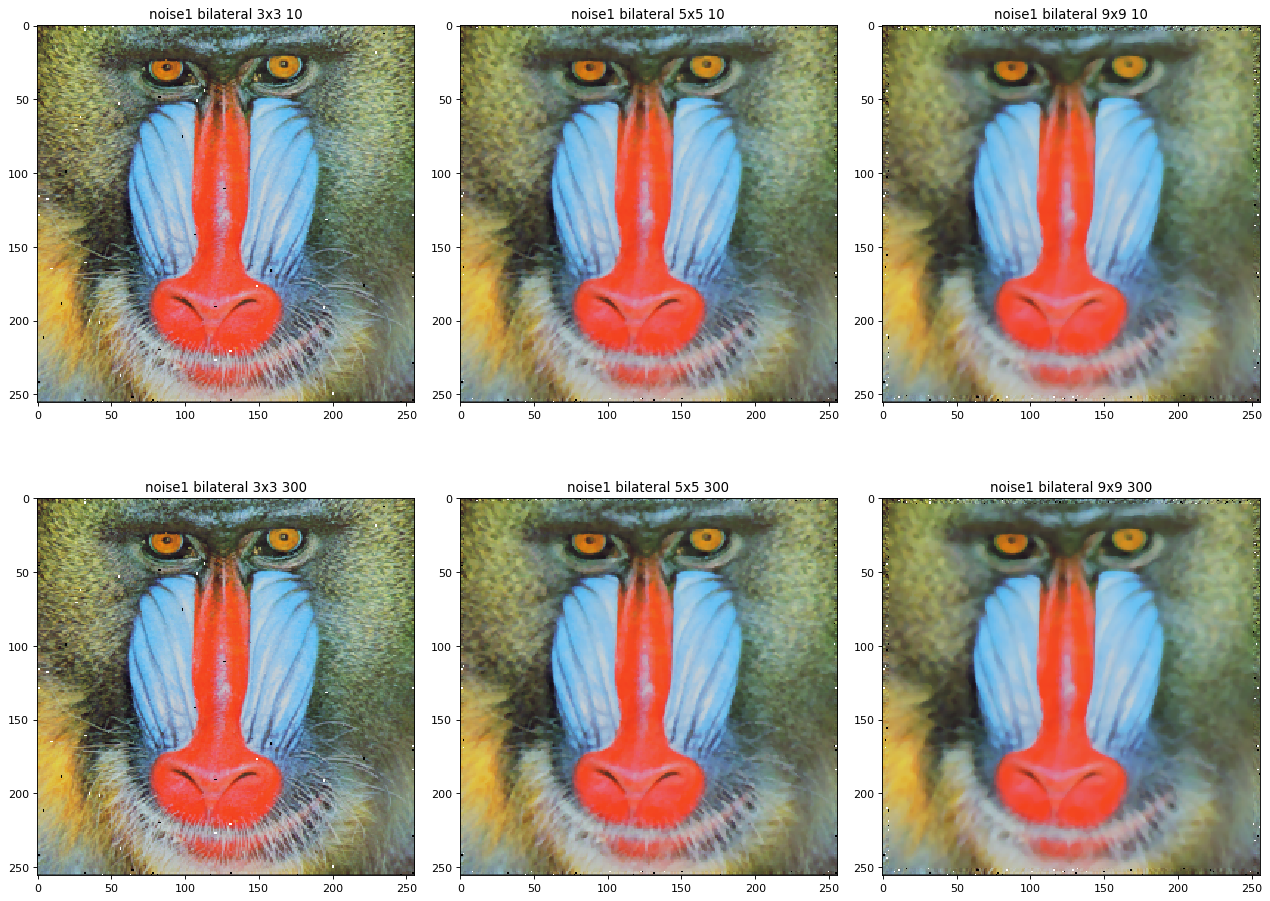

In [297]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(231)
plt.title('noise1 bilateral 3x3 10')
plt.imshow(bi1_1_10)
plt.subplot(232)
plt.title('noise1 bilateral 5x5 10')
plt.imshow(bi1_2_10)
plt.subplot(233)
plt.title('noise1 bilateral 9x9 10')
plt.imshow(bi1_3_10)
plt.subplot(234)
plt.title('noise1 bilateral 3x3 300')
plt.imshow(bi1_1_300)
plt.subplot(235)
plt.title('noise1 bilateral 5x5 300')
plt.imshow(bi1_2_300)
plt.subplot(236)
plt.title('noise1 bilateral 9x9 300')
plt.imshow(bi1_3_300)
plt.tight_layout()

In [309]:
result2_psnr_bi1=np.zeros((2,3))
result2_psnr_bi1[0][0]=PSNR(monkey_clean,bi1_1_10)
result2_psnr_bi1[0][1]=PSNR(monkey_clean,bi1_2_10)
result2_psnr_bi1[0][2]=PSNR(monkey_clean,bi1_3_10)
result2_psnr_bi1[1][0]=PSNR(monkey_clean,bi1_1_300)
result2_psnr_bi1[1][1]=PSNR(monkey_clean,bi1_2_300)
result2_psnr_bi1[1][2]=PSNR(monkey_clean,bi1_3_300)
print('bilateral filter psnr result, 단위는 dB')
pd.DataFrame(result2_psnr_bi1, index=['range_sigma=10','range_sigma=300'],columns=["3x3", "5x5", '9x9'])

bilateral filter psnr result, 단위는 dB


3x3        5x5        9x9
range_sigma=10   73.29594  69.178386  66.994218
range_sigma=300  73.29594  69.178249  66.993851

In [299]:
result2_time_bi1=np.zeros((2,3))
result2_time_bi1[0][0]=time2_bi11
result2_time_bi1[0][1]=time2_bi12
result2_time_bi1[0][2]=time2_bi13
result2_time_bi1[1][0]=time2_bi14
result2_time_bi1[1][1]=time2_bi15
result2_time_bi1[1][2]=time2_bi16
print('time result, 단위는 초')
pd.DataFrame(result2_time_bi1, index=['range_sigma=10','range_sigma=300'],columns=["3x3", "5x5", '9x9'])

time result, 단위는 초


3x3        5x5        9x9
range_sigma=10   27.473003  42.870961  88.338339
range_sigma=300  28.196825  43.451243  87.542184

In [302]:
start = time.time()
bi2_1_10=conv_bilateral(monkey_noise2,0.6,10)
time2_bi21=time.time()-start
start = time.time()
bi2_2_10=conv_bilateral(monkey_noise2,1,10)
time2_bi22=time.time()-start
start = time.time()
bi2_3_10=conv_bilateral(monkey_noise2,1.6,10)
time2_bi23=time.time()-start
start = time.time()
bi2_1_300=conv_bilateral(monkey_noise2,0.6,300)
time2_bi24=time.time()-start
start = time.time()
bi2_2_300=conv_bilateral(monkey_noise2,1,300)
time2_bi25=time.time()-start
start = time.time()
bi2_3_300=conv_bilateral(monkey_noise2,1.6,300)
time2_bi26=time.time()-start

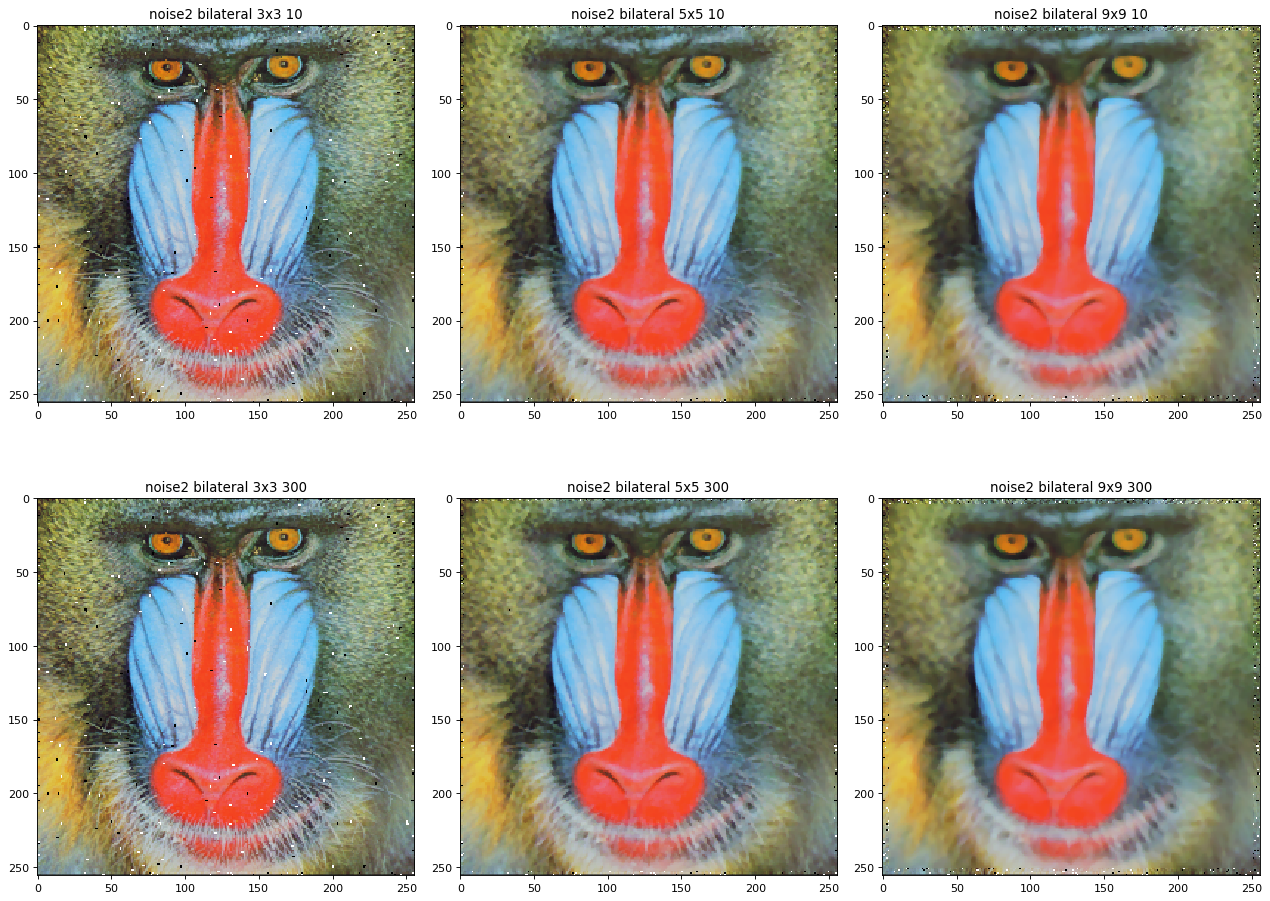

In [303]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(231)
plt.title('noise2 bilateral 3x3 10')
plt.imshow(bi2_1_10)
plt.subplot(232)
plt.title('noise2 bilateral 5x5 10')
plt.imshow(bi2_2_10)
plt.subplot(233)
plt.title('noise2 bilateral 9x9 10')
plt.imshow(bi2_3_10)
plt.subplot(234)
plt.title('noise2 bilateral 3x3 300')
plt.imshow(bi2_1_300)
plt.subplot(235)
plt.title('noise2 bilateral 5x5 300')
plt.imshow(bi2_2_300)
plt.subplot(236)
plt.title('noise2 bilateral 9x9 300')
plt.imshow(bi2_3_300)
plt.tight_layout()

In [310]:
result2_psnr_bi2=np.zeros((2,3))
result2_psnr_bi2[0][0]=PSNR(monkey_clean,bi2_1_10)
result2_psnr_bi2[0][1]=PSNR(monkey_clean,bi2_2_10)
result2_psnr_bi2[0][2]=PSNR(monkey_clean,bi2_3_10)
result2_psnr_bi2[1][0]=PSNR(monkey_clean,bi2_1_300)
result2_psnr_bi2[1][1]=PSNR(monkey_clean,bi2_2_300)
result2_psnr_bi2[1][2]=PSNR(monkey_clean,bi2_3_300)
print('bilateral filter psnr result, 단위는 dB')
pd.DataFrame(result2_psnr_bi2, index=['range_sigma=10','range_sigma=300'],columns=["3x3", "5x5", '9x9'])

bilateral filter psnr result, 단위는 dB


3x3        5x5        9x9
range_sigma=10   69.206086  68.476064  66.373641
range_sigma=300  69.206052  68.475974  66.373285

In [306]:
result2_time_bi2=np.zeros((2,3))
result2_time_bi2[0][0]=time2_bi21
result2_time_bi2[0][1]=time2_bi22
result2_time_bi2[0][2]=time2_bi23
result2_time_bi2[1][0]=time2_bi24
result2_time_bi2[1][1]=time2_bi25
result2_time_bi2[1][2]=time2_bi26
print('time result, 단위는 초')
pd.DataFrame(result2_time_bi2, index=['range_sigma=10','range_sigma=300'],columns=["3x3", "5x5", '9x9'])

time result, 단위는 초


3x3        5x5        9x9
range_sigma=10   24.656691  39.600015  84.684730
range_sigma=300  24.894163  43.091267  81.436668

이미지가 많아져서 나타내는데 셀 두칸을 활용하였다. 먼저 정성적으로 살펴보았을때, 3x3 bilateral median filter가 모든 필터중에 가장 원본과 유사한 이미지를 도출하는것을 확인할 수 있다. psnr값이 모두 압도적으로 높다. 다만 아쉬운점은 선명하게 디테일이 살아있음에도 약간씩 salt and pepper 노이즈의 잔재가 눈에 띈다. 필터 사이즈가 커질수록 이미지가 흐릿해지는것을 관찰할 수 있으며 range_sigma의 값이 크게 다름에도 큰 차이는 확인하기 어려웠다. 정량적으로 살펴볼경우 커널계산식이 복잡하기 때문에 커널의 사이즈가 커질수록 시간이 거의 두배씩 길어졌다. 또한 psnr 수치로부터 확인할 수 있듯이 노이즈1,2 모두 3x3 필터가 가장 우수한 결과를 나타내었다. 그러나 만약 salt and pepper 노이즈를 아예 없애고 싶다면 5x5커널을 사용하면 된다. 노이즈가 적을경우에는 정확도 차이가 꽤 크게 나지만 노이즈2 이미지처럼 노이즈가 많을경우에는 3x3와 5x5의 원본 유사도에 큰 차이는 없다

extra credit
러닝타임을 줄이기 위해서는 우선 커널의 사이즈를 작게 유지해야한다. 커널의 사이즈가 커질수록 PSNR 값도 떨어졌으므로 커널의 사이즈는 3x3으로 유지하고 파이썬을 사용하는게 아니라 c++를 사용하고, 시스템 메모리 수준의 optimization을 거치면 된다
성능을 개선하기 위해서는 3x3 사이즈 커널을 이용하고 이를 적용했을때 나타난 이미지에 salt and pepper 에러가 조금 남아있다는것에서 착안하여, salt and pepper에러의 pixel값인 0, 1 을 대상으로만 box 필터를 적용해서 검은색 및 하얀색 지점을 pointwise 하게 평균값으로 대체해주면 된다. 그럼 정확도가 획기적으로 개선될것이다